<a href="https://colab.research.google.com/github/nvj1d/GANs_with_python/blob/main/Simple_Generator_with_upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.layers import Conv2D

In [7]:
import numpy as np
import matplotlib.pyplot as plt

this is a simple generator that produce a simple 10x10 grayscale image

In [2]:
# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(UpSampling2D())
# fill in detail in the upsampled feature maps and output a single image
model.add(Conv2D(1, (3,3), padding='same'))
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3200)              323200    
                                                                 
 reshape (Reshape)           (None, 5, 5, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 10, 10, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 1)         1153      
                                                                 
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 106ms/step


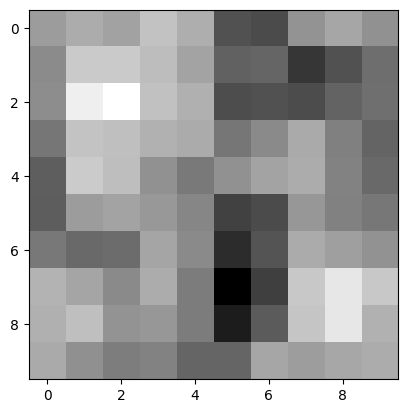

In [11]:
# Prepare an input tensor
input_tensor = np.random.rand(1, 100)

# Get the model's output
output_tensor = model.predict(input_tensor)

# Display the generated image
plt.imshow(output_tensor[0, :, :, 0], cmap='gray')
plt.show()